# Data Pre Processing 

In [431]:
import pandas as pd

In [432]:
#read data from data set 
data1 = pd.read_csv("DataSets/col_mat_nuw_output.csv",header = None)
data2 = pd.read_csv("DataSets/kan_output.csv", header=None)
data3 = pd.read_csv("DataSets/mon_kur_jaf_output.csv", header=None)
data = pd.concat([data1,data2,data3])
data.shape

(12782, 4)

In [433]:
data.columns = ["HCHO reading", "Location", "Current Date", "Next Date"]
data

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna Proper,2023-12-27,2023-12-28
5474,0.000051,Jaffna Proper,2023-12-28,2023-12-29
5475,0.000127,Jaffna Proper,2023-12-29,2023-12-30
5476,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [434]:
for column in data:
    print(column)
    print(data[column].unique())
    print('\n')

HCHO reading
[1.96983440e-04 2.62552217e-04 9.85211890e-05 ... 1.26723537e-04
 1.16658954e-04 6.54085299e-05]


Location
['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper' 'Kandy Proper'
 'Bibile, Monaragala' 'Kurunegala Proper' 'Jaffna Proper']


Current Date
['2019-01-01' '2019-01-02' '2019-01-03' ... '2023-12-29' '2023-12-30'
 '2023-12-31']


Next Date
['2019-01-02' '2019-01-03' '2019-01-04' ... '2023-12-30' '2023-12-31'
 '2024-01-01']


In [435]:
colombo_df = data[data['Location'] == "Colombo Proper"]
jaffna_df = data[data['Location'] == "Jaffna Proper"]
deniyaya_df = data[data['Location'] == "Deniyaya, Matara"]
nuwaraEliya_df = data[data['Location'] == "Nuwara Eliya Proper"]
kandy_df = data[data['Location'] == "Kandy Proper"]
bibile_df = data[data['Location'] == "Bibile, Monaragala"]
kurunegala_df = data[data['Location'] == "Kurunegala Proper"]

In [436]:
colombo_df

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
1821,0.000118,Colombo Proper,2023-12-27,2023-12-28
1822,NaN,Colombo Proper,2023-12-28,2023-12-29
1823,NaN,Colombo Proper,2023-12-29,2023-12-30
1824,0.000140,Colombo Proper,2023-12-30,2023-12-31


In [437]:
colombo_df= colombo_df.drop(columns=['Next Date'])
colombo_df["Current Date"] = pd.to_datetime(colombo_df["Current Date"])
colombo_df.set_index("Current Date", inplace=True)

In [438]:
jaffna_df

,HCHO reading,Location,Current Date,Next Date
3652,0.000058,Jaffna Proper,2019-01-01,2019-01-02
3653,0.000102,Jaffna Proper,2019-01-02,2019-01-03
3654,0.000039,Jaffna Proper,2019-01-03,2019-01-04
3655,-0.000002,Jaffna Proper,2019-01-04,2019-01-05
3656,0.000159,Jaffna Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna Proper,2023-12-27,2023-12-28
5474,0.000051,Jaffna Proper,2023-12-28,2023-12-29
5475,0.000127,Jaffna Proper,2023-12-29,2023-12-30
5476,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [439]:
# jaffna_df= jaffna_df.drop(columns=['Next Date'])
# jaffna_df["Current Date"] = pd.to_datetime(jaffna_df["Current Date"])
# jaffna_df.set_index("Current Date", inplace=True)

In [440]:
deniyaya_df

,HCHO reading,Location,Current Date,Next Date
1826,NaN,"Deniyaya, Matara",2019-01-01,2019-01-02
1827,0.000006,"Deniyaya, Matara",2019-01-02,2019-01-03
1828,0.000236,"Deniyaya, Matara",2019-01-03,2019-01-04
1829,0.000064,"Deniyaya, Matara",2019-01-04,2019-01-05
1830,0.000053,"Deniyaya, Matara",2019-01-05,2019-01-06
...,...,...,...,...
3647,0.000228,"Deniyaya, Matara",2023-12-27,2023-12-28
3648,NaN,"Deniyaya, Matara",2023-12-28,2023-12-29
3649,NaN,"Deniyaya, Matara",2023-12-29,2023-12-30
3650,0.000116,"Deniyaya, Matara",2023-12-30,2023-12-31


In [441]:
deniyaya_df= deniyaya_df.drop(columns=['Next Date'])
deniyaya_df["Current Date"] = pd.to_datetime(deniyaya_df["Current Date"])
deniyaya_df.set_index("Current Date", inplace=True)

In [442]:
nuwaraEliya_df

,HCHO reading,Location,Current Date,Next Date
3652,NaN,Nuwara Eliya Proper,2019-01-01,2019-01-02
3653,NaN,Nuwara Eliya Proper,2019-01-02,2019-01-03
3654,0.000191,Nuwara Eliya Proper,2019-01-03,2019-01-04
3655,0.000051,Nuwara Eliya Proper,2019-01-04,2019-01-05
3656,0.000065,Nuwara Eliya Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya Proper,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya Proper,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya Proper,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya Proper,2023-12-30,2023-12-31


In [443]:
nuwaraEliya_df= nuwaraEliya_df.drop(columns=['Next Date'])
nuwaraEliya_df["Current Date"] = pd.to_datetime(nuwaraEliya_df["Current Date"])
nuwaraEliya_df.set_index("Current Date", inplace=True)

In [444]:
kandy_df

,HCHO reading,Location,Current Date,Next Date
0,0.000176,Kandy Proper,2019-01-01,2019-01-02
1,0.000092,Kandy Proper,2019-01-02,2019-01-03
2,NaN,Kandy Proper,2019-01-03,2019-01-04
3,0.000191,Kandy Proper,2019-01-04,2019-01-05
4,0.000122,Kandy Proper,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Kandy Proper,2023-12-27,2023-12-28
1822,NaN,Kandy Proper,2023-12-28,2023-12-29
1823,NaN,Kandy Proper,2023-12-29,2023-12-30
1824,0.000056,Kandy Proper,2023-12-30,2023-12-31


In [445]:
kandy_df= kandy_df.drop(columns=['Next Date'])
kandy_df["Current Date"] = pd.to_datetime(kandy_df["Current Date"])
kandy_df.set_index("Current Date", inplace=True)

In [446]:
bibile_df

,HCHO reading,Location,Current Date,Next Date
0,NaN,"Bibile, Monaragala",2019-01-01,2019-01-02
1,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
2,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
3,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
4,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,"Bibile, Monaragala",2023-12-27,2023-12-28
1822,NaN,"Bibile, Monaragala",2023-12-28,2023-12-29
1823,NaN,"Bibile, Monaragala",2023-12-29,2023-12-30
1824,NaN,"Bibile, Monaragala",2023-12-30,2023-12-31


In [447]:
bibile_df= bibile_df.drop(columns=['Next Date'])
bibile_df["Current Date"] = pd.to_datetime(bibile_df["Current Date"])
bibile_df.set_index("Current Date", inplace=True)

In [448]:
kurunegala_df

,HCHO reading,Location,Current Date,Next Date
1826,0.000088,Kurunegala Proper,2019-01-01,2019-01-02
1827,0.000137,Kurunegala Proper,2019-01-02,2019-01-03
1828,0.000148,Kurunegala Proper,2019-01-03,2019-01-04
1829,-0.000002,Kurunegala Proper,2019-01-04,2019-01-05
1830,0.000249,Kurunegala Proper,2019-01-05,2019-01-06
...,...,...,...,...
3647,0.000075,Kurunegala Proper,2023-12-27,2023-12-28
3648,NaN,Kurunegala Proper,2023-12-28,2023-12-29
3649,NaN,Kurunegala Proper,2023-12-29,2023-12-30
3650,0.000158,Kurunegala Proper,2023-12-30,2023-12-31


In [449]:
kurunegala_df= kurunegala_df.drop(columns=['Next Date'])
kurunegala_df["Current Date"] = pd.to_datetime(kurunegala_df["Current Date"])
kurunegala_df.set_index("Current Date", inplace=True)

In [450]:
colombo_df.isnull().sum()

HCHO reading    487
Location          0
dtype: int64

In [451]:
#Filling null values using mode method
colombo_df_mode_value = colombo_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
colombo_df['HCHO reading'].fillna(colombo_df_mode_value, inplace=True)

In [452]:
colombo_df.isnull().sum()

HCHO reading    0
Location        0
dtype: int64

In [453]:
jaffna_df.isnull().sum()

HCHO reading    365
Location          0
Current Date      0
Next Date         0
dtype: int64

In [454]:
jaffna_mode_value = jaffna_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
jaffna_df['HCHO reading'].fillna(jaffna_mode_value, inplace=True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_17940\3096387436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jaffna_df['HCHO reading'].fillna(jaffna_mode_value, inplace=True)


In [455]:
jaffna_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

In [456]:
kandy_df.isnull().sum()

HCHO reading    793
Location          0
dtype: int64

In [457]:
kandy_mode_value = kandy_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
kandy_df['HCHO reading'].fillna(kandy_mode_value, inplace=True)

In [458]:
kandy_df.isnull().sum()

HCHO reading    0
Location        0
dtype: int64

In [459]:
nuwaraEliya_df.isnull().sum()

HCHO reading    1085
Location           0
dtype: int64

In [460]:
nuwaraEliya_mode_value = nuwaraEliya_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
nuwaraEliya_df['HCHO reading'].fillna(nuwaraEliya_mode_value, inplace = True)

In [461]:
nuwaraEliya_df.isnull().sum()

HCHO reading    0
Location        0
dtype: int64

In [462]:
bibile_df.isnull().sum()

HCHO reading    695
Location          0
dtype: int64

In [463]:
bibille_mode_value = bibile_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
bibile_df['HCHO reading'].fillna(bibille_mode_value, inplace = True)

In [464]:
bibile_df.isnull().sum()

HCHO reading    0
Location        0
dtype: int64

In [465]:
deniyaya_df.isnull().sum()

HCHO reading    847
Location          0
dtype: int64

In [466]:
deniyaya_mode_value =deniyaya_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
deniyaya_df["HCHO reading"].fillna(deniyaya_mode_value, inplace = True)

In [467]:
deniyaya_df.isnull().sum()

HCHO reading    0
Location        0
dtype: int64

In [468]:
kurunegala_df.isnull().sum()

HCHO reading    592
Location          0
dtype: int64

In [469]:
kurunegala_mode_value =kurunegala_df["HCHO reading"].fillna(method='bfill').fillna(method='ffill')
kurunegala_df["HCHO reading"].fillna(kurunegala_mode_value,inplace = True)

In [470]:
kurunegala_df.isnull().sum()

HCHO reading    0
Location        0
dtype: int64

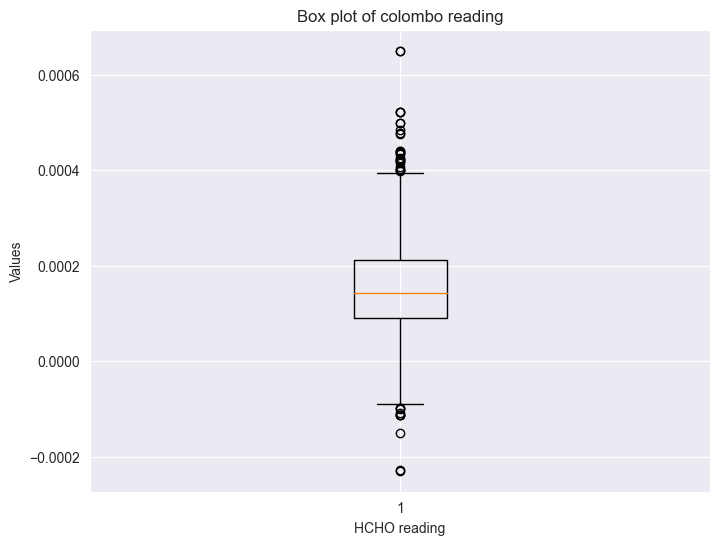

In [471]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(colombo_df['HCHO reading'])
plt.title('Box plot of colombo reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

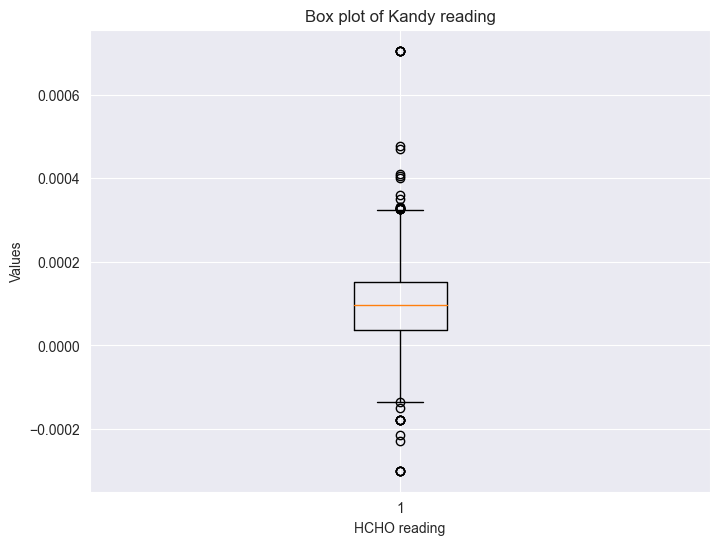

In [472]:
plt.figure(figsize=(8, 6))
plt.boxplot(kandy_df['HCHO reading'])
plt.title('Box plot of Kandy reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

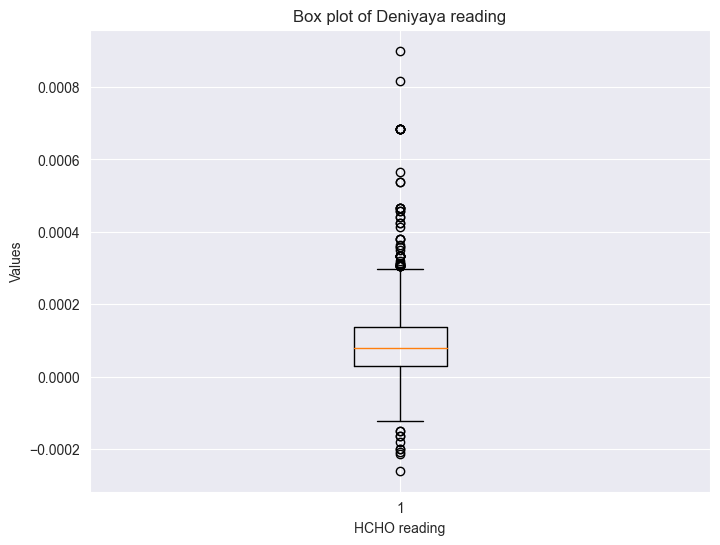

In [473]:
plt.figure(figsize=(8, 6))
plt.boxplot(deniyaya_df['HCHO reading'])
plt.title('Box plot of Deniyaya reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [474]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = deniyaya_df['HCHO reading'].quantile(0.25)
Q3 = deniyaya_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = deniyaya_df['HCHO reading'][deniyaya_df['HCHO reading'] <= upper_whisker].max()

print("Upper bound within the boxplot:", upper_bound_data)

Upper bound within the boxplot: 0.0002964527594232


In [475]:
deniyaya_df = deniyaya_df.drop(deniyaya_df[(deniyaya_df['HCHO reading'] >= 0.0005638530012409)].index)

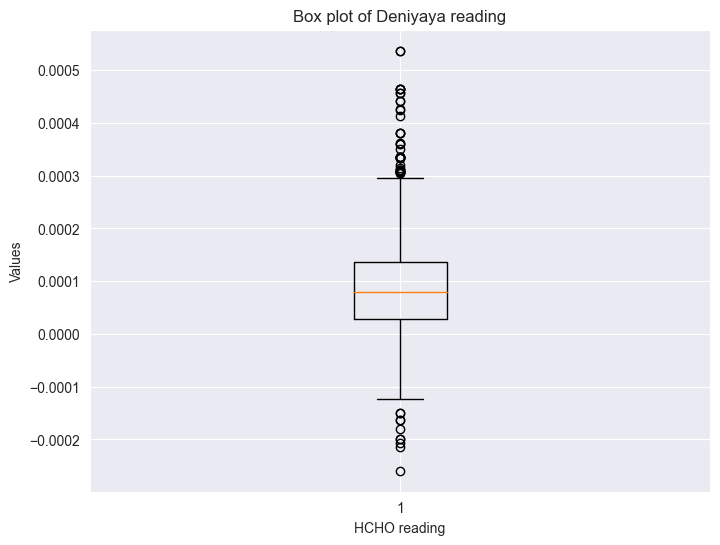

In [476]:
plt.figure(figsize=(8, 6))
plt.boxplot(deniyaya_df['HCHO reading'])
plt.title('Box plot of Deniyaya reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

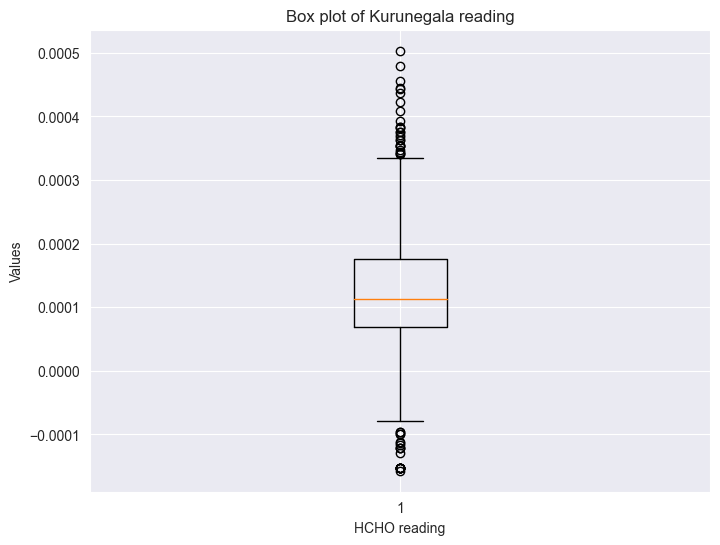

In [477]:
plt.figure(figsize=(8, 6))
plt.boxplot(kurunegala_df['HCHO reading'])
plt.title('Box plot of Kurunegala reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

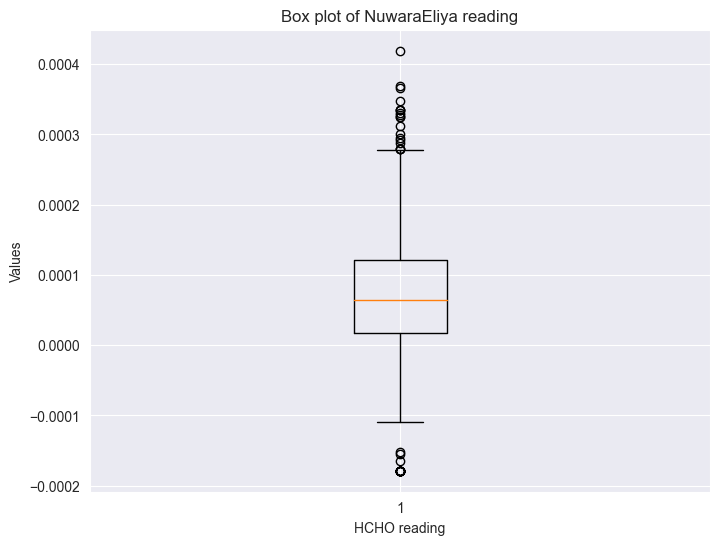

In [478]:
plt.figure(figsize=(8, 6))
plt.boxplot(nuwaraEliya_df['HCHO reading'])
plt.title('Box plot of NuwaraEliya reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [479]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = nuwaraEliya_df['HCHO reading'].quantile(0.25)
Q3 = nuwaraEliya_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = nuwaraEliya_df['HCHO reading'][nuwaraEliya_df['HCHO reading'] <= upper_whisker].max()


print("Upper bound within the boxplot:", upper_bound_data)

Upper bound within the boxplot: 0.0002771661984116


In [480]:
nuwaraEliya_df = nuwaraEliya_df.drop(nuwaraEliya_df[(nuwaraEliya_df['HCHO reading'] >= 0.0003689670671425)].index)

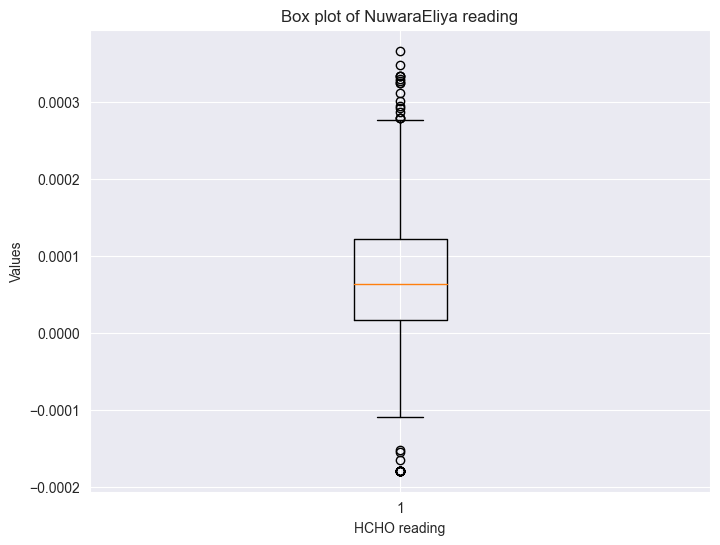

In [481]:
plt.figure(figsize=(8, 6))
plt.boxplot(nuwaraEliya_df['HCHO reading'])
plt.title('Box plot of NuwaraEliya reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

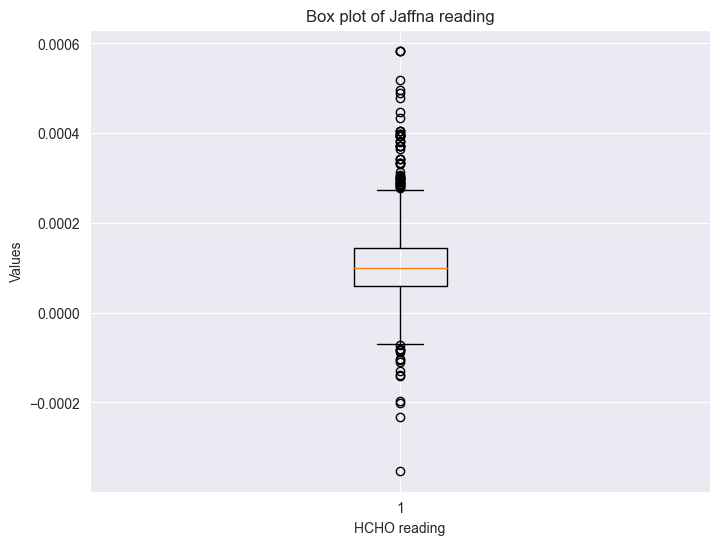

In [482]:
plt.figure(figsize=(8, 6))
plt.boxplot(jaffna_df['HCHO reading'])
plt.title('Box plot of Jaffna reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [483]:
# Upper Bound and lower bound of the Dataset
# Calculate Q1, Q3, and IQR
Q1 = jaffna_df['HCHO reading'].quantile(0.25)
Q3 = jaffna_df['HCHO reading'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker and lower whisker value
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR
# Find the highest data point within the upper whisker range
upper_bound_data = jaffna_df['HCHO reading'][jaffna_df['HCHO reading'] <= upper_whisker].max()
# Find the lowest data point within the lower whisker range
lower_bound_data = jaffna_df['HCHO reading'][jaffna_df['HCHO reading'] >= lower_whisker].min()

print("Upper bound within the boxplot:", upper_bound_data)
print("Lower bound within the boxplot:", lower_bound_data)

Upper bound within the boxplot: 0.0002729933174109
Lower bound within the boxplot: -6.91114370543075e-05


In [484]:
jaffna_df = jaffna_df.drop(jaffna_df[(jaffna_df['HCHO reading'] >= 0.000307007082162)].index)
jaffna_df = jaffna_df.drop(jaffna_df[(jaffna_df['HCHO reading'] <= -0.0001409249825353)].index)

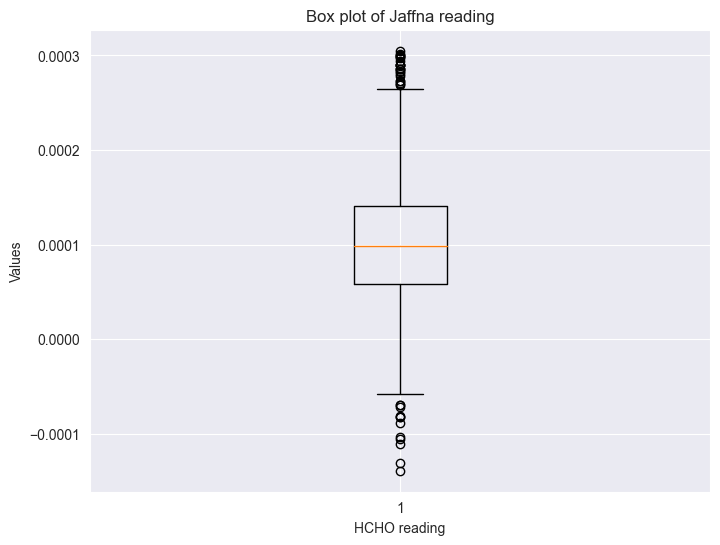

In [485]:
plt.figure(figsize=(8, 6))
plt.boxplot(jaffna_df['HCHO reading'])
plt.title('Box plot of Jaffna reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

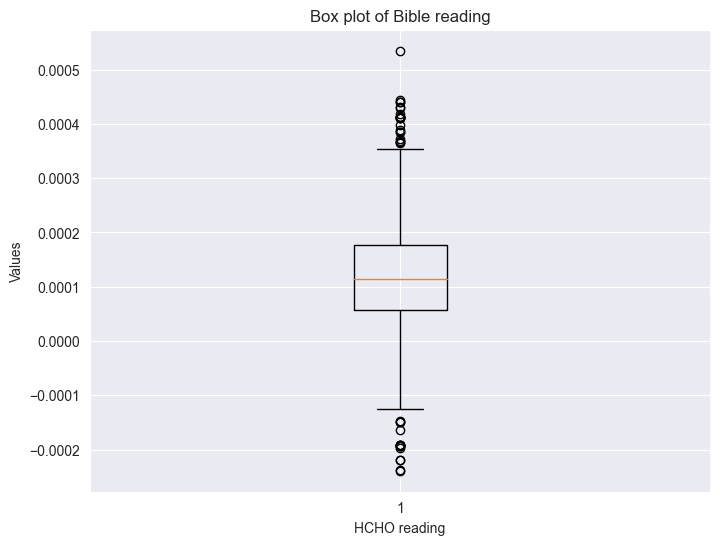

In [486]:
plt.figure(figsize=(8, 6))
plt.boxplot(bibile_df['HCHO reading'])
plt.title('Box plot of Bible reading')
plt.xlabel('HCHO reading')
plt.ylabel('Values')
plt.show()

In [487]:
colombo_df["Current Date"].duplicated().sum()

KeyError: 'Current Date'

In [ ]:
colombo_df["Next Date"].duplicated().sum()

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(colombo_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("The dataframe is stationary")

In [ ]:
result = adfuller(kandy_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("The dataframe is stationary")

In [ ]:
result = adfuller(bibile_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("The dataframe is stationary")

In [ ]:
result = adfuller(kurunegala_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("the The dataframe is stationary")
    

In [ ]:
result = adfuller(jaffna_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("The dataframe is stationary")

In [ ]:
result = adfuller(nuwaraEliya_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("The dataframe is stationary")

In [ ]:
result = adfuller(deniyaya_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
print (result[1])
if result[1] <= 0.05:
    print("The dataframe is stationary")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


In [488]:
# Split data into training and testing sets (adjust split ratio as needed)
split_ratio = 0.8
train_size = int(len(colombo_df) * split_ratio)
train_data, test_data = colombo_df[0:train_size], colombo_df[train_size:]

# Define and fit the ARIMA model on training data
model = ARIMA(train_data["HCHO reading"], order=(1, 1, 1))  # Adjust order as needed
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE: 0.00010340039179900689
MSE: 1.0691641024188131e-08
MAPE: 143.5945262105585


C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [489]:
# Split data into training and testing sets (adjust split ratio as needed)
split_ratio = 0.8
train_size = int(len(nuwaraEliya_df) * split_ratio)
train_data, test_data = nuwaraEliya_df[0:train_size], nuwaraEliya_df[train_size:]

# Define and fit the ARIMA model on training data
model = ARIMA(train_data["HCHO reading"], order=(1, 1, 1))  # Adjust order as needed
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 0.00010988975542743162
MSE: 1.2075758347900736e-08
MAPE: 101.315512731711


C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [490]:
# Split data into training and testing sets (adjust split ratio as needed)
split_ratio = 0.8
train_size = int(len(deniyaya_df) * split_ratio)
train_data, test_data = deniyaya_df[0:train_size], deniyaya_df[train_size:]

# Define and fit the ARIMA model on training data
model = ARIMA(train_data["HCHO reading"], order=(1, 1, 1))  # Adjust order as needed
model_fit = model.fit()

# Forecast for test data
forecast = model_fit.forecast(steps=len(test_data))

# Calculate evaluation metrics on test data
rmse = mean_squared_error(test_data["HCHO reading"], forecast, squared=False)  # Root Mean Squared Error
mse = mean_squared_error(test_data["HCHO reading"], forecast)  # Mean Squared Error
mape = mean_absolute_percentage_error(test_data["HCHO reading"], forecast) * 100  # Mean Absolute Percentage Error

# Print the evaluation metrics
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RMSE: 9.428983400399764e-05
MSE: 8.890572796501429e-09
MAPE: 2918.7776498339977


C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1460
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11604.709
Date:                Tue, 16 Apr 2024   AIC                         -23205.419
Time:                        12:58:54   BIC                         -23194.848
Sample:                    01-01-2019   HQIC                        -23201.475
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3019   8.88e-20   -3.4e+18      0.000      -0.302      -0.302
sigma2      7.226e-09   1.27e-10     57.082      0.000    6.98e-09    7.47e-09
Ljung-Box (L1) (Q):                   3.89   Jarque-

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2019-01-01    0.000000
2019-01-02    0.000176
2019-01-03    0.000118
2019-01-04    0.000161
2019-01-05    0.000191
                ...   
2023-12-02    0.000006
2023-12-03    0.000006
2023-12-04    0.000006
2023-12-05    0.000006
2023-12-06    0.000006
Freq: D, Name: predicted_mean, Length: 1801, dtype: float64

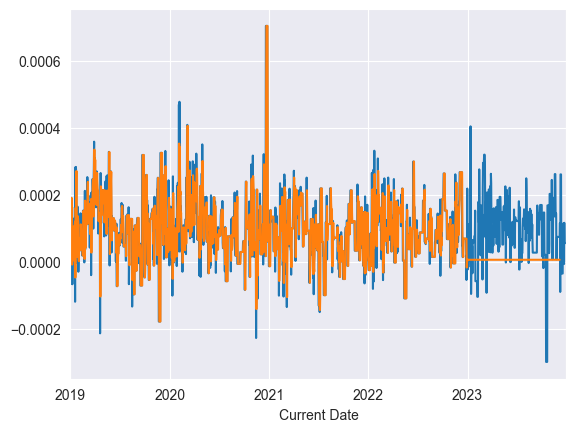

In [491]:
# Split data into training and testing sets
train_size = int(len(kandy_df) * 0.8)
train_data, test_data = kandy_df[0:train_size], kandy_df[train_size:]

# Define ARIMA model 
model = ARIMA(train_data['HCHO reading'], order=(1, 1, 0))
model_fit = model.fit()

forecast = model_fit.predict(end = 1800)
print(model_fit.summary())

kandy_df["HCHO reading"].plot()
forecast.plot()
forecast

                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1460
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11504.356
Date:                Tue, 16 Apr 2024   AIC                         -23004.712
Time:                        12:58:54   BIC                         -22994.141
Sample:                    01-01-2019   HQIC                        -23000.768
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3708   4.49e-19  -8.25e+17      0.000      -0.371      -0.371
sigma2      8.294e-09   1.92e-10     43.113      0.000    7.92e-09    8.67e-09
Ljung-Box (L1) (Q):                  11.17   Jarque-

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2019-01-01    0.000000
2019-01-02    0.000197
2019-01-03    0.000238
2019-01-04    0.000159
2019-01-05    0.000169
                ...   
2023-12-02    0.000245
2023-12-03    0.000245
2023-12-04    0.000245
2023-12-05    0.000245
2023-12-06    0.000245
Freq: D, Name: predicted_mean, Length: 1801, dtype: float64

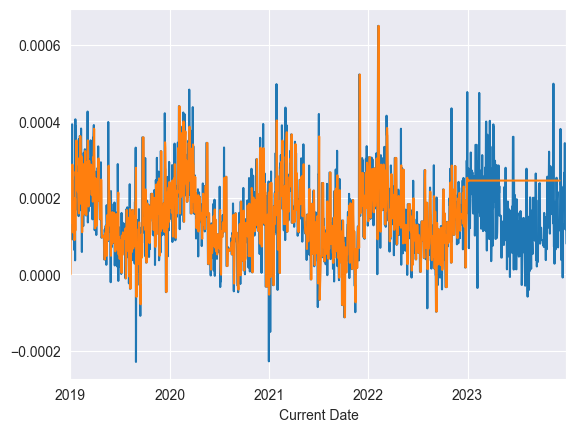

In [492]:
# Split data into training and testing sets
train_size = int(len(colombo_df) * 0.8)
train_data, test_data = colombo_df[0:train_size], colombo_df[train_size:]

# Define ARIMA model 
model = ARIMA(train_data['HCHO reading'], order=(1, 1, 0))
model_fit = model.fit()

forecast = model_fit.predict(end = 1800)
print(model_fit.summary())

colombo_df["HCHO reading"].plot()
forecast.plot()
forecast

                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1460
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11517.670
Date:                Tue, 16 Apr 2024   AIC                         -23031.341
Time:                        12:58:55   BIC                         -23020.770
Sample:                    01-01-2019   HQIC                        -23027.397
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3334   4.31e-19  -7.73e+17      0.000      -0.333      -0.333
sigma2      8.146e-09   1.87e-10     43.620      0.000    7.78e-09    8.51e-09
Ljung-Box (L1) (Q):                   8.49   Jarque-

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2019-01-01    0.000000
2019-01-02    0.000019
2019-01-03    0.000019
2019-01-04    0.000025
2019-01-05    0.000034
                ...   
2022-12-26    0.000064
2022-12-27    0.000064
2022-12-28    0.000107
2022-12-29    0.000068
2022-12-30    0.000012
Freq: D, Name: predicted_mean, Length: 1460, dtype: float64

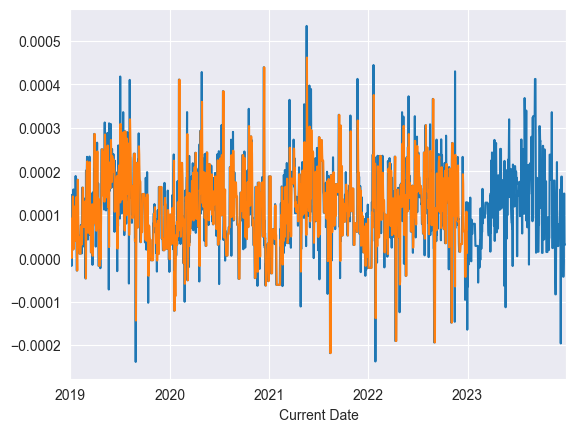

In [493]:
# Split data into training and testing sets
train_size = int(len(bibile_df) * 0.8)
train_data, test_data = bibile_df[0:train_size], bibile_df[train_size:]

# Define ARIMA model 
model = ARIMA(train_data['HCHO reading'], order=(1, 1, 0))
model_fit = model.fit()

forecast = model_fit.predict(start= 0)
print(model_fit.summary())

bibile_df["HCHO reading"].plot()
forecast.plot()
forecast

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood 

                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1459
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11888.358
Date:                Tue, 16 Apr 2024   AIC                         -23772.716
Time:                        12:58:55   BIC                         -23762.146
Sample:                             0   HQIC                        -23768.772
                               - 1459                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2644    1.7e-19  -1.56e+18      0.000      -0.264      -0.264
sigma2      4.818e-09    9.7e-11     49.685      0.000    4.63e-09    5.01e-09
Ljung-Box (L1) (Q):                   3.45   Jarque-

Current Date
2019-01-01    0.000000
2019-01-02    0.000191
2019-01-03    0.000191
2019-01-04    0.000191
2019-01-05    0.000088
                ...   
2022-12-27   -0.000082
2022-12-28    0.000058
2022-12-29    0.000089
2022-12-30    0.000082
2022-12-31    0.000042
Name: predicted_mean, Length: 1459, dtype: float64

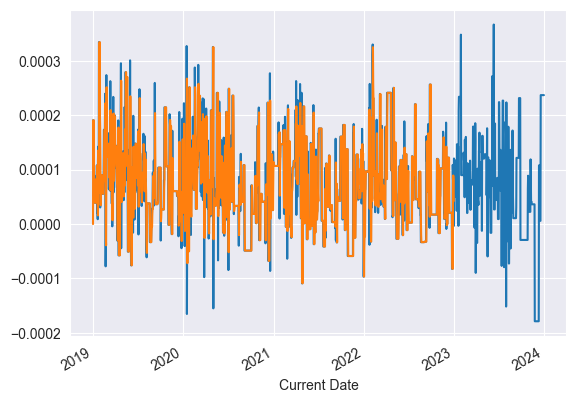

In [494]:
# Split data into training and testing sets
train_size = int(len(nuwaraEliya_df) * 0.8)
train_data, test_data = nuwaraEliya_df[0:train_size], nuwaraEliya_df[train_size:]

# Define ARIMA model 
model = ARIMA(train_data['HCHO reading'], order=(1, 1, 0))
model_fit = model.fit()

forecast = model_fit.predict(start= 0)
print(model_fit.summary())

nuwaraEliya_df["HCHO reading"].plot()
forecast.plot()
forecast

                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1452
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11597.605
Date:                Tue, 16 Apr 2024   AIC                         -23191.210
Time:                        12:58:55   BIC                         -23180.650
Sample:                             0   HQIC                        -23187.270
                               - 1452                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2546   1.18e-19  -2.15e+18      0.000      -0.255      -0.255
sigma2      6.688e-09    1.4e-10     47.809      0.000    6.41e-09    6.96e-09
Ljung-Box (L1) (Q):                   6.46   Jarque-

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood 

Current Date
2019-01-01    0.000000
2019-01-02    0.000006
2019-01-03    0.000006
2019-01-04    0.000178
2019-01-05    0.000108
                ...   
2022-12-28    0.000138
2022-12-29    0.000175
2022-12-30    0.000049
2022-12-31   -0.000026
2023-01-01    0.000252
Name: predicted_mean, Length: 1452, dtype: float64

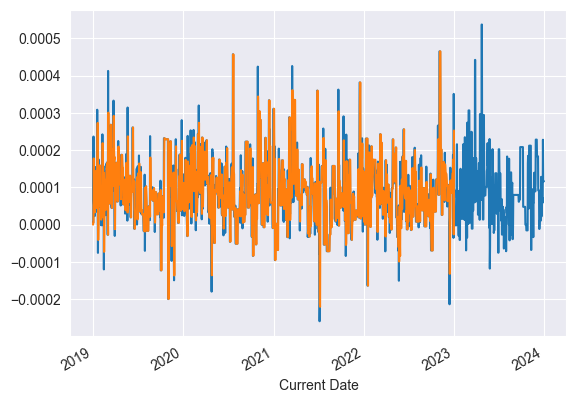

In [495]:
# Split data into training and testing sets
train_size = int(len(deniyaya_df) * 0.8)
train_data, test_data = deniyaya_df[0:train_size], deniyaya_df[train_size:]

# Define ARIMA model 
model = ARIMA(train_data['HCHO reading'], order=(1, 1, 0))
model_fit = model.fit()

forecast = model_fit.predict(start = 0)
print(model_fit.summary())

a = deniyaya_df["HCHO reading"]
a.plot()
forecast.plot()
forecast

In [496]:
deniyaya_df

,HCHO reading,Location
Current Date,,
2019-01-01,0.000006,"Deniyaya, Matara"
2019-01-02,0.000006,"Deniyaya, Matara"
2019-01-03,0.000236,"Deniyaya, Matara"
2019-01-04,0.000064,"Deniyaya, Matara"
2019-01-05,0.000053,"Deniyaya, Matara"
...,...,...
2023-12-27,0.000228,"Deniyaya, Matara"
2023-12-28,0.000116,"Deniyaya, Matara"
2023-12-29,0.000116,"Deniyaya, Matara"


C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1460
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11649.855
Date:                Tue, 16 Apr 2024   AIC                         -23295.711
Time:                        12:58:56   BIC                         -23285.140
Sample:                    01-01-2019   HQIC                        -23291.767
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3662   1.78e-19  -2.06e+18      0.000      -0.366      -0.366
sigma2      6.779e-09   1.78e-10     38.058      0.000    6.43e-09    7.13e-09
Ljung-Box (L1) (Q):                  13.66   Jarque-

2019-01-01    0.000000
2019-01-02    0.000088
2019-01-03    0.000119
2019-01-04    0.000144
2019-01-05    0.000053
                ...   
2024-01-21    0.000151
2024-01-22    0.000151
2024-01-23    0.000151
2024-01-24    0.000151
2024-01-25    0.000151
Freq: D, Name: predicted_mean, Length: 1851, dtype: float64

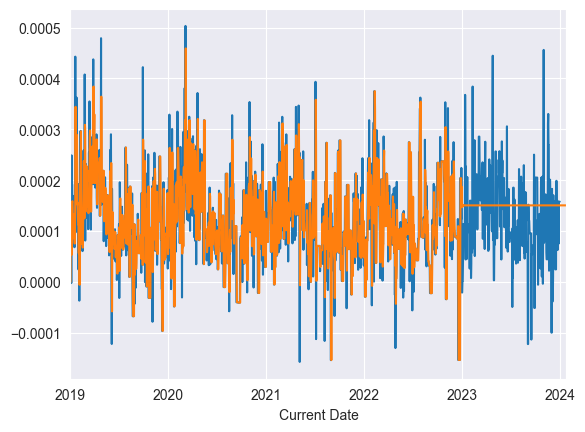

In [497]:
# Split data into training and testing sets
train_size = int(len(kurunegala_df) * 0.8)
train_data, test_data = kurunegala_df[0:train_size], kurunegala_df[train_size:]

# Define ARIMA model 
model = ARIMA(train_data['HCHO reading'], order=(1, 1, 0))
model_fit = model.fit()

forecast = model_fit.predict(end = 1850)
print(model_fit.summary())

kurunegala_df["HCHO reading"].plot()
forecast.plot()
forecast

In [498]:
kurunegala_df

,HCHO reading,Location
Current Date,,
2019-01-01,0.000088,Kurunegala Proper
2019-01-02,0.000137,Kurunegala Proper
2019-01-03,0.000148,Kurunegala Proper
2019-01-04,-0.000002,Kurunegala Proper
2019-01-05,0.000249,Kurunegala Proper
...,...,...
2023-12-27,0.000075,Kurunegala Proper
2023-12-28,0.000158,Kurunegala Proper
2023-12-29,0.000158,Kurunegala Proper


In [499]:
jaffna_df.shape

(1785, 4)

                               SARIMAX Results                                
Dep. Variable:           HCHO reading   No. Observations:                 1428
Model:                 ARIMA(1, 1, 0)   Log Likelihood               11623.018
Date:                Tue, 16 Apr 2024   AIC                         -23242.037
Time:                        12:59:27   BIC                         -23231.510
Sample:                             0   HQIC                        -23238.105
                               - 1428                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4012   2.04e-19  -1.97e+18      0.000      -0.401      -0.401
sigma2      4.931e-09   1.66e-10     29.754      0.000    4.61e-09    5.26e-09
Ljung-Box (L1) (Q):                  13.92   Jarque-

C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS TUF\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS TUF\AppData\Local\

0       0.000000
1       0.000058
2       0.000084
3       0.000064
4       0.000014
          ...   
1806    0.000111
1807    0.000111
1808    0.000111
1809    0.000111
1810    0.000111
Name: predicted_mean, Length: 1811, dtype: float64

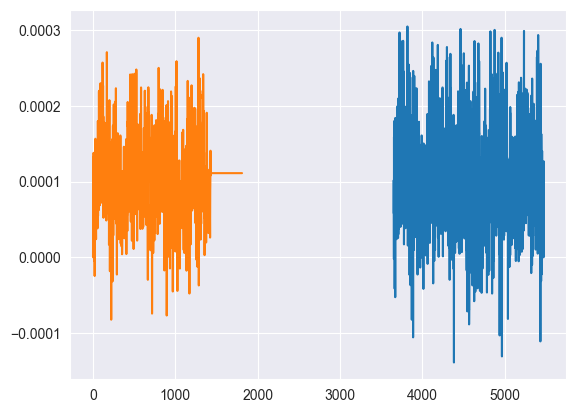

In [501]:
# Split data into training and testing sets
train_size = int(len(jaffna_df) * 0.8)
train_data, test_data = jaffna_df[0:train_size], jaffna_df[train_size:]

# Define ARIMA model 
model = ARIMA(train_data['HCHO reading'], order=(1, 1, 0))
model_fit = model.fit()

forecast = model_fit.predict(start= 0, end= 1810)
print(model_fit.summary())

# jaffna_df["HCHO reading"].plot()
jaffna_df["HCHO reading"].plot()
forecast.plot()
forecast

In [ ]:
forecast.shape